Correlation matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


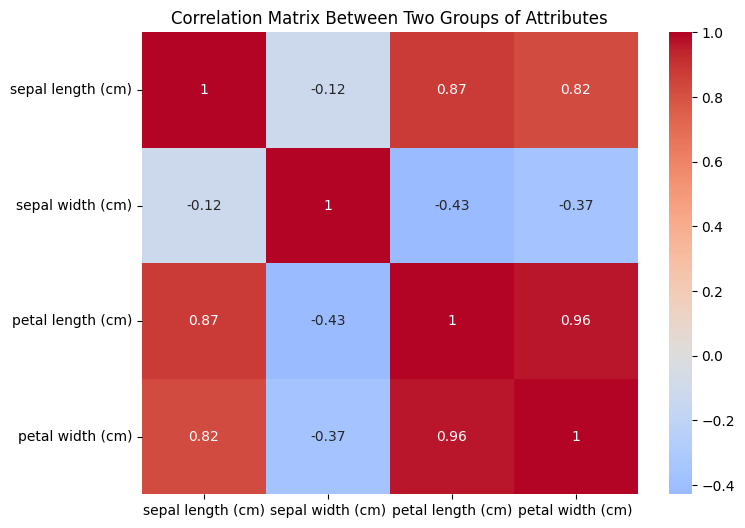


Strong correlations (|r| >= 0.7):
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000               NaN           0.871754   
sepal width (cm)                 NaN               1.0                NaN   
petal length (cm)           0.871754               NaN           1.000000   
petal width (cm)            0.817941               NaN           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)                NaN  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset (Iris dataset)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Let's assume we want to check correlation between the first two columns and the last two columns
group1 = df.iloc[:, :]  # First two columns
group2 = df.iloc[:, :]  # Last two columns

# Initialize an empty DataFrame to store correlations
correlation_matrix = pd.DataFrame(index=group1.columns, columns=group2.columns)

# Calculate the Pearson correlation for each pair of attributes from group1 and group2
for col1 in group1.columns:
    for col2 in group2.columns:
        correlation_matrix.loc[col1, col2] = group1[col1].corr(group2[col2])

# Convert the correlation matrix values to float
correlation_matrix = correlation_matrix.astype(float)

# Display the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# Visualize correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix Between Two Groups of Attributes")
plt.show()

# Determine strong correlations (|r| >= 0.7)
threshold = 0.7
strong_correlations = correlation_matrix[(correlation_matrix.abs() >= threshold)]
print("\nStrong correlations (|r| >= 0.7):")
print(strong_correlations.dropna(how='all').dropna(axis=1, how='all'))
